In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris  # iris data
from sklearn.naive_bayes import GaussianNB  # Naive-Bayes 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

## Loading Dataset

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## Targets

In [4]:
targets = iris['target_names']
targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Converting data from the dataset to a `DataFrame`

In [5]:
df = pd.DataFrame(
    data = np.c_[iris['data'], iris['target']], # concatening data and target values
    columns = iris['feature_names'] + ['target']    # concatening data column names with target
)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [8]:
df.shape

(150, 5)

In [9]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

No null values

In [10]:
X = df.drop('target', axis="columns")
y = df.target

In [11]:
X.shape, y.shape

((150, 4), (150,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=True)

In [13]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

## Naive-Bayes Model

In [14]:
model = GaussianNB()

In [15]:
model.fit(X_train, y_train)

GaussianNB()

## Checking overfitting or underfitting

In [16]:
model.score(X_test, y_test)

1.0

In [17]:
model.score(X_train, y_train)

0.95

Both are almost equal, so we can conculde no overfitting or underfitting.

## Prediction

In [18]:
y_pred = model.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

1.0

## Confusion Matrix and Plot of it

In [20]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]])

Text(0.5, 15.0, 'Predicted Label')

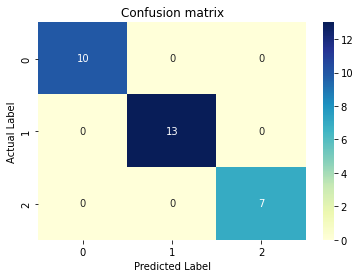

In [21]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## Classification Report

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

